# Time Series Analysis - II: Climate Change - Harrisonburg

## Motivation

We discussed ealier in class that asking good research questions is important. 

I also showed you at the beginning the following illustration from the NYT Article: [See how 2023 shattered records to become the hottest year](https://www.nytimes.com/2024/01/09/climate/2023-warmest-year-record.html?unlocked_article_code=1.OE0.lr_8.zWk2Q2jaRch8&smid=url-share) 

<img src="../assets/nyt.jpg" width="600">

Let's see whether we can use what we already learned to ask a similar question about temperatures near Harrisonburg, using our Dale Enterprise weather dataset.

For reference, here is a plot of raw data for Daily Maximum Temperature at daily resolution. 

<img src="../assets/rawData.jpg" width="600">

### Research Question

Are monthly* temperatures changing near Harrisonburg, VA?  


<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Quick Challenge</h3>
    
List the differences in the displayed data between the NYT article and our station data. 
    
(Hint: Try to focus on the data rather than labels, etc...)
    
These will guide the neccesary processing steps. 

</div>


## Learning Goals

After completing this exercise you should be able to 

- resample data in time
- construct a loop in Python 
- select rows and columns from a dataframe
- select time series data by month, year, ... 

We are also examining some features of our data and you will be able to 

- explore hypothesis about climate data  
- compare local to global change

**Answer to quick challenge**

- our data is daily, while the NYT data is monthly
- our data is plotted by year, while the NYT data is plotted by month
- our data has TMIN and TMAX, while the NYT data is ? 
- our data has a range from 1900-today, while the NYT data uses 1940-2023
- our data is local, while the NYT data is a global average
- our data has an annual cycle, but the NYT data has the annual cycle removed 
- the NYT data is compared to pre-industrial data 

There are some things, like the local data, that we cannot change, but we can make process our data in similar ways for the others. For example, we can choose to 

- only use data from 1940-2023 OR 
- to average our data from daily to monthly. 

A lot of these data processing steps can be executed with a few lines of code. 


### Loading the data 

We load the time series data in exactly the same way as we did the last time, parsing the dates into the `index`. This allows us to easily manipulate the data on time. 

In [57]:
# Let's import the neccesary libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# and read the data
daleEnterprise = pd.read_csv('../data/USC00442208_19000101-20240122.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['DATE'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['DATE']
                  )


daleEnterprise.head() # We confirm that we have successfully read the data 

,STATION,NAME,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,,,
1900-01-01,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1900-01-02,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
1900-01-03,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
1900-01-04,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
1900-01-05,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN


Because we are focusing on temperatures, we can just focus on the `TMAX` and `TMIN` comlumns.


In [59]:
columns = ['TMAX', 'TMIN']
daleEnterprise = daleEnterprise[columns]

daleEnterprise

,TMAX,TMIN
DATE,,
1900-01-01,-5.6,-14.4
1900-01-02,1.7,-17.2
1900-01-03,2.8,-12.8
1900-01-04,5.6,-16.1
1900-01-05,11.7,-5.6
...,...,...
2024-01-18,NaN,NaN
2024-01-19,NaN,NaN
2024-01-20,NaN,NaN


## Data Processing

### Monthly Temporal Resolution 

***Because our data is daily, while the NYT data is monthly***, we should resample our data to monthly as well. 

Pandas has a nifty method for that called [`.resample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). To do that, we need to select our _aggregation method_, and the _resampling frequency_. 

In our case, it makes sense to select a monthly timestep `.resample('MS')` and to average the data `.mean()`. 

The `'MS'` stands for _Month Start_. Resample allows for many different timesteps expressed as a number followed by a period indicator, for example `'17min'`,`'3h'`,`'2D'`. You can try these out if you want. 


In [60]:
daleEnterpriseMonthly = daleEnterprise.resample('1MS').mean() # The 1 is not needed and just added for consistency.
daleEnterpriseMonthly


,TMAX,TMIN
DATE,,
1900-01-01,8.816129,-6.603226
1900-02-01,6.414286,-8.282143
1900-03-01,10.774194,-4.912903
1900-04-01,19.543333,2.110000
1900-05-01,26.426667,6.812903
...,...,...
2023-09-01,26.746667,11.753846
2023-10-01,21.660000,5.480000
2023-11-01,14.110000,-1.723333


Let's just quickly plot our data, whether it looks reasonable? 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Quick Challenge</h3>
    
Does the below plot, show what we would expect? 

</div>

<AxesSubplot:xlabel='DATE'>

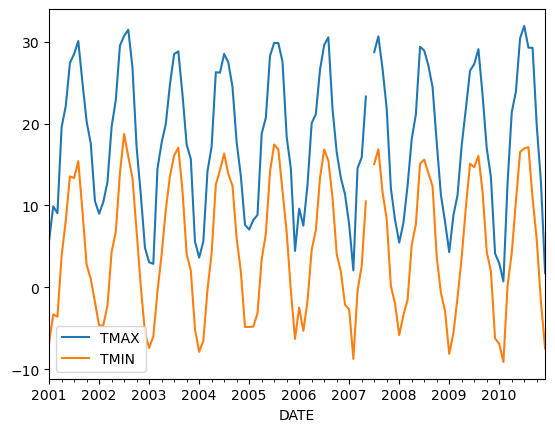

In [11]:
daleEnterpriseMonthly.loc["2001":"2010"].plot(y=['TMAX', 'TMIN'])

### Monthly Time Axis

**Because our data is plotted by year, while the NYT data is plotted by month** we need to create a monthly time axis. 

Because *pandas* knows that it is a time series with [date objects](https://docs.python.org/3/library/datetime.html), we can simply extract the `month` attribute from the `index` and assing it to a new column called `'Month'`. 


In [17]:
daleEnterpriseMonthly['Month']=daleEnterpriseMonthly.index.month # year, month, day, hour, are all valid attributes
daleEnterpriseMonthly

,TMAX,TMIN,Month
DATE,,,
1900-01-01,8.816129,-6.603226,1
1900-02-01,6.414286,-8.282143,2
1900-03-01,10.774194,-4.912903,3
1900-04-01,19.543333,2.110000,4
1900-05-01,26.426667,6.812903,5
...,...,...,...
2023-09-01,26.746667,11.753846,9
2023-10-01,21.660000,5.480000,10
2023-11-01,14.110000,-1.723333,11


Let's plot this and we will see that things are not quite right. 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Quick Challenge</h3>
    
What is going on here? 

</div>

<AxesSubplot:xlabel='Month'>

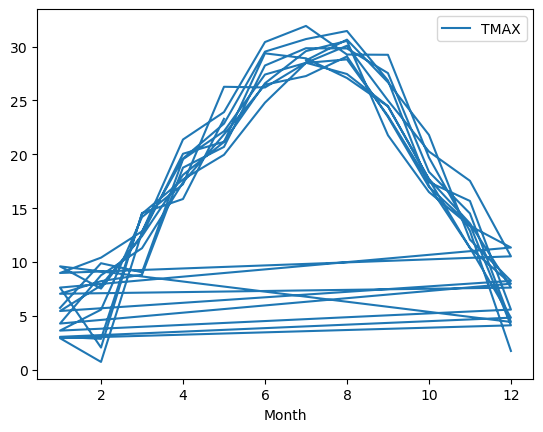

In [19]:
daleEnterpriseMonthly["2001":"2010"].plot(y='TMAX',x='Month')

Even though we are plotting this with _Month_ on the x-axis, it is still considered a single time series and the plotting function creates a single line. 

This means, we should plot one line per year, rather than a single line. 

A quick and hacky way of doing this would be to create a loop that loops over the years and plots a line. 

Reminder, that a loop in python is done like this?

``` 
for i in range(0,10):
    <do something>

```

In [26]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>
    
- Modify the loop below to loop over the years from 2000 to 2010: 
- Modify the plotting statement to use the `year` rather than a specific time. 
</div>

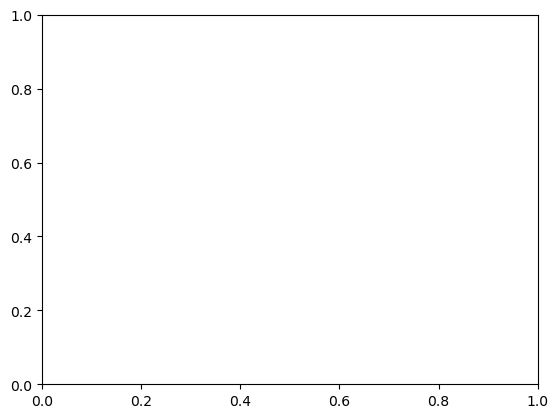

In [33]:
fig, ax = plt.subplots()

for i in range(2000,2000): # Modify the range to match 2000 to 2010.
    year = str(i) # Don't change this line
    print(year)
    # Modify the line below
    daleEnterpriseMonthly.loc["2000":"2010"].plot(kind = 'line',y='TMAX',x='Month', ax=ax, legend = False) 




We see that our data has a clear annual cycle, which we would expect. However, this cycle is removed in the NYT plot, when they compare to pre-industrial averages. 

###  Remove annual cycle and compare and assess warming compared to earlier time

**To get closer to the NYT figure, we should remove the annual cycle and substract an estimate of the earlier climate.**

Because, we don't have pre-industrial (~1790) measurements, maybe we can remove the monthly means for 1900-1930. 

We could continue to work with the data set above, but it is easier to just do all the above processing in a single step. 

Pivot Tables are a powerful tool to do this, because they can aggregate data and reformat tables. They are a bit hard to understand, but essentially I am averaging all `TMAX` for each month and then distibute them into a table with _'Year'_ in the rows and _'Month'_ in the columns.

In [36]:
daleEnterprise['Month']=daleEnterprise.index.month
daleEnterprise['Year']=daleEnterprise.index.year
daleEnterprise_Pivot = pd.pivot_table(daleEnterprise, values='TMAX', index=['Year'],
                       columns=['Month'], aggfunc="mean")


daleEnterprise_Pivot 

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1900,8.816129,6.414286,10.774194,19.543333,26.426667,27.433333,32.174194,33.980000,31.113333,22.538710,15.250000,8.825806
1901,8.277419,4.928571,13.674194,14.683333,22.974194,27.406667,30.719355,28.016129,24.520000,20.845161,10.500000,7.177419
1902,5.641935,2.867857,14.000000,17.303333,25.670968,28.040000,31.758065,29.151613,26.093333,20.783871,16.690000,7.248387
1903,5.970968,9.332143,16.716129,18.346667,25.235484,23.766667,29.964516,27.416129,24.940000,19.980000,11.443333,5.087097
1904,4.106452,3.655172,12.690323,15.960000,23.335484,26.600000,28.551613,27.758065,26.310000,20.964516,12.730000,5.636667
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,8.264516,10.341379,15.674194,16.916667,20.522581,27.233333,31.316129,28.948387,24.273333,20.116129,16.306897,7.906667
2021,5.667742,5.478571,14.790323,18.955172,23.366667,28.000000,30.610000,30.496667,25.540000,21.293103,11.924138,12.817241
2022,4.296667,8.688889,14.264286,17.540000,22.838710,27.930000,29.193548,28.106452,24.963333,17.967742,14.053333,7.093548


Next we can calculate define a time for averaging (lets say the first 30 years of the 1900') and calculate the average and substract that from all data. 

In [37]:
# Calculate the average between 1900 and 1929
T_Avg_30y = daleEnterprise_Pivot.loc[1900:1929].mean(axis = 'rows')  
print(T_Avg_30y)

daleEnterprise_Pivot = daleEnterprise_Pivot - T_Avg_30y
daleEnterprise_Pivot

Month
1      7.157222
2      7.679781
3     13.982581
4     18.848736
5     24.315416
6     27.924444
7     30.317978
8     29.178853
9     26.818184
10    20.999367
11    13.358520
12     7.684823
dtype: float64


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1900,1.658907,-1.265495,-3.208387,0.694598,2.111251,-0.491111,1.856215,4.801147,4.295149,1.539342,1.891480,1.140984
1901,1.120197,-2.751209,-0.308387,-4.165402,-1.341222,-0.517778,0.401376,-1.162724,-2.298184,-0.154206,-2.858520,-0.507403
1902,-1.515287,-4.811924,0.017419,-1.545402,1.355552,0.115556,1.440086,-0.027240,-0.724851,-0.215496,3.331480,-0.436435
1903,-1.186254,1.652362,2.733548,-0.502069,0.920068,-4.157778,-0.353462,-1.762724,-1.878184,-1.019367,-1.915187,-2.597726
1904,-3.050771,-4.024608,-1.292258,-2.888736,-0.979932,-1.324444,-1.766366,-1.420789,-0.508184,-0.034851,-0.628520,-2.048156
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.107294,2.661599,1.691613,-1.932069,-3.792835,-0.691111,0.998151,-0.230466,-2.544851,-0.883238,2.948377,0.221844
2021,-1.489480,-2.201209,0.807742,0.106437,-0.948749,0.075556,0.292022,1.317814,-1.278184,0.293736,-1.434382,5.132419
2022,-2.860556,1.009108,0.281705,-1.308736,-1.476706,0.005556,-1.124430,-1.072401,-1.854851,-3.031625,0.694813,-0.591274


Plotting this, shows that pandas plots one line for each column, which is not what we want: 

<AxesSubplot:xlabel='Year'>

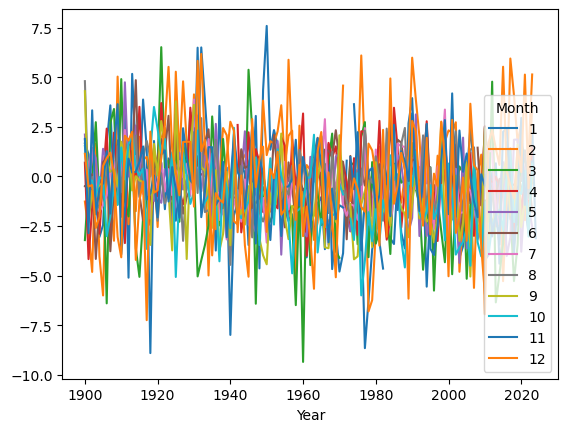

In [38]:
daleEnterprise_Pivot.plot()

Luckily we can just swap columns and rows, which mathematically is a `transpose`. The command for this is `.T`.


<AxesSubplot:xlabel='Month'>

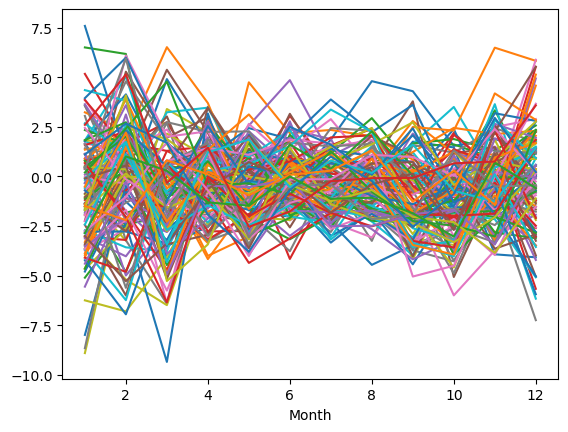

In [47]:
daleEnterprise_Pivot=daleEnterprise_Pivot.T
daleEnterprise_Pivot.plot(legend = False)

We can now clean this up, by 

- by selecting a subset of columns `.loc[:,columns]` selects by column rather than rows
- assigning specific colors ([there are a ton of options](https://matplotlib.org/stable/gallery/color/named_colors.html)) to lines
- adding labes, etc. 

Et Voila ...


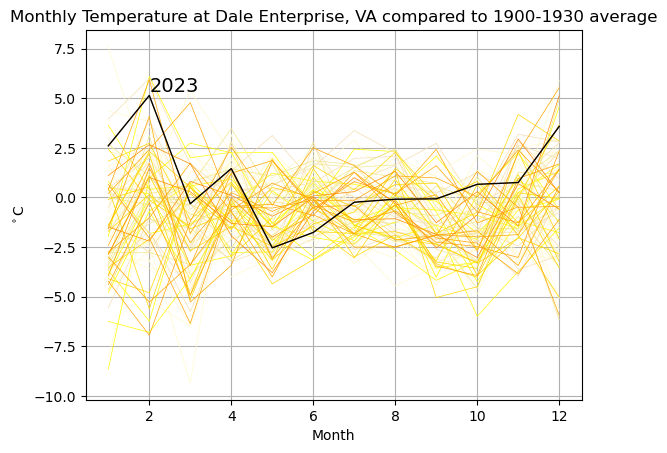

In [56]:
fig, ax = plt.subplots()
daleEnterprise_Pivot.loc[:,"1940":"1969"].plot(legend = False, color = 'lemonchiffon', linewidth = 0.5, ax=ax)
daleEnterprise_Pivot.loc[:,1970:1979].plot(legend = False, color = 'yellow', linewidth = 0.5, ax=ax)
daleEnterprise_Pivot.loc[:,1980:1989].plot(legend = False, color = 'khaki', linewidth = 0.5, ax=ax)
daleEnterprise_Pivot.loc[:,1990:1999].plot(legend = False, color = 'wheat', linewidth = 0.5, ax=ax)
daleEnterprise_Pivot.loc[:,2000:2009].plot(legend = False, color = 'gold', linewidth = 0.5, ax=ax)
daleEnterprise_Pivot.loc[:,2010:2019].plot(legend = False, color = 'orange', linewidth = 0.5, ax=ax)
daleEnterprise_Pivot.loc[:,2020:2023].plot(legend = False, color = 'darkorange', linewidth = 0.5, ax=ax)

daleEnterprise_Pivot.loc[:,2023].plot(legend = False, color = 'k', linewidth = 1, ax=ax, grid = True, 
                                title = 'Monthly Temperature at Dale Enterprise, VA compared to 1900-1930 average',
                                ylabel = '$^\circ$C', xlabel = 'Month')

ax = plt.text(2,5.3, '2023', fontsize = 14)


<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>
    
- What can we conclude for climate near Harrisonburg? 
    - Let's try to be specific with respect to time and temperature. 
    
- What else could we look at? 
    

</div>


## Take-aways

### Technical

After completing this exercise you should be able to 

- resample data in time
- construct a loop in Python 
- select rows and columns from a dataframe
- select time series data by month, year, ... 


There are a few important take-aways. For example:

1. We can reproduce complicated figures with not too many steps. Don't worry you won't have to, but python and pandas are powerful.
2. Over time your skills will grow - with practice - and these operations will feel more natural. 


### Climate/ Environmental Systems

1. A single station can behave very differenly from the overall climate system? 
2. Rather than looking at temperature overall, it can make sense to be specific like looking at minimum temperatures or specific seasons. 




<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Mega Challenge</h3>
    
- Repeat the same analysis for 'TMIN' instead

- Difficult: Create summer and winter averages (Climate scientists use DJF and JJA) 
    - Plot these. Can we see a trend?

</div>